In [2]:
pip install holidays-es

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from math import pi, sin, cos
from datetime import datetime
from holidays_es import get_provinces, Province
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import layers
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

2022-08-31 09:56:52.487989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-31 09:56:52.488845: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [28]:
df = pd.read_csv('raw_data/station_1.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        25862 non-null  int64  
 1   activate            25862 non-null  int64  
 2   name                25862 non-null  object 
 3   reservations_count  25862 non-null  int64  
 4   light               25862 non-null  int64  
 5   total_bases         25862 non-null  int64  
 6   free_bases          25862 non-null  int64  
 7   number              25862 non-null  object 
 8   longitude           25862 non-null  float64
 9   no_available        25862 non-null  int64  
 10  address             25862 non-null  object 
 11  latitude            25862 non-null  float64
 12  dock_bikes          25862 non-null  int64  
 13  id                  25862 non-null  object 
 14  time                25862 non-null  int64  
 15  date                25862 non-null  object 
 16  holi

In [30]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [31]:
df.year.unique()

array([2018, 2019, 2020, 2021])

In [32]:
temp = df.copy()

In [33]:
#temp['date'] = pd.to_datetime(temp['date'])

In [34]:
temp.shape

(25862, 28)

### Scaling and Encoding :

In [40]:
temp.select_dtypes(['int', 'float']).columns

Index(['activate', 'reservations_count', 'light', 'total_bases', 'free_bases',
       'longitude', 'no_available', 'latitude', 'dock_bikes', 'time',
       'feels_like', 'weekday', 'year', 'month', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [70]:
temp

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,...,year,month,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,wind_speed,weather_main
0,1,Puerta del Sol A,0,2,24,11,1a,-3.702425,0,Puerta del Sol n 1,...,2018,8,0.000000,1.000000,0.974928,-0.222521,1.0,6.123234e-17,2.10,Clear
1,1,Puerta del Sol A,0,0,24,18,1a,-3.702425,0,Puerta del Sol n 1,...,2018,8,0.258819,0.965926,0.974928,-0.222521,1.0,6.123234e-17,2.06,Clear
2,1,Puerta del Sol A,0,2,24,13,1a,-3.702425,0,Puerta del Sol n 1,...,2018,8,0.500000,0.866025,0.974928,-0.222521,1.0,6.123234e-17,1.54,Clear
3,1,Puerta del Sol A,0,0,24,17,1a,-3.702425,0,Puerta del Sol n 1,...,2018,8,0.707107,0.707107,0.974928,-0.222521,1.0,6.123234e-17,1.03,Clear
4,1,Puerta del Sol A,0,0,24,22,1a,-3.702425,0,Puerta del Sol n 1,...,2018,8,0.866025,0.500000,0.974928,-0.222521,1.0,6.123234e-17,1.60,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25857,1,Puerta del Sol A,1,0,30,21,1a,-3.701834,0,Puerta del Sol nº 1,...,2021,6,-0.965926,0.258819,0.974928,-0.222521,0.5,8.660254e-01,5.66,Clear
25858,1,Puerta del Sol A,0,0,30,22,1a,-3.701834,0,Puerta del Sol nº 1,...,2021,6,-0.866025,0.500000,0.974928,-0.222521,0.5,8.660254e-01,3.60,Clear
25859,1,Puerta del Sol A,0,0,30,21,1a,-3.701834,0,Puerta del Sol nº 1,...,2021,6,-0.707107,0.707107,0.974928,-0.222521,0.5,8.660254e-01,3.60,Clear
25860,1,Puerta del Sol A,0,0,30,24,1a,-3.701834,0,Puerta del Sol nº 1,...,2021,6,-0.500000,0.866025,0.974928,-0.222521,0.5,8.660254e-01,3.60,Clear


In [47]:
from sklearn.preprocessing import StandardScaler

f_transformer = StandardScaler()

temp[['activate', 'reservations_count', 'light', 'total_bases', 'free_bases', 'longitude', 'no_available', 'latitude', 'time',
       'feels_like', 'weekday', 'year', 'month', 'hour_sin', 'hour_cos',
        'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos']] = f_transformer.fit_transform(temp[['activate', 'reservations_count', 'light', 'total_bases', 'free_bases', 'longitude', 'no_available', 'latitude', 'time',
       'feels_like', 'weekday', 'year', 'month', 'hour_sin', 'hour_cos',
        'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos']])


In [53]:
temp.columns

Index(['activate', 'name', 'reservations_count', 'light', 'total_bases',
       'free_bases', 'number', 'longitude', 'no_available', 'address',
       'latitude', 'dock_bikes', 'id', 'time', 'date', 'holidays', 'datetime',
       'feels_like', 'weather_main', 'weekday', 'year', 'month', 'hour_sin',
       'hour_cos', 'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [49]:
temp.holidays = temp.holidays.astype('int')

In [52]:
temp_model = temp.drop(columns=['name', 'number', 'address', 'id',   ])

,activate,reservations_count,light,total_bases,free_bases,longitude,no_available,latitude,dock_bikes,time,...,feels_like,weekday,year,month,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos
activate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reservations_count,NaN,1.000000,-0.021643,-0.066784,0.031040,-0.066800,-0.076070,-0.062000,-0.010379,0.050295,...,0.053337,-0.018612,-0.033546,-0.005572,-0.024455,-0.077211,0.019538,-0.024415,0.033972,0.014798
light,NaN,-0.021643,1.000000,-0.036222,-0.616747,-0.029881,0.582823,-0.071778,0.220619,0.109597,...,-0.163352,0.005678,-0.080039,-0.035707,-0.135344,-0.064964,-0.013053,0.004448,-0.216451,-0.022947
total_bases,NaN,-0.066784,-0.036222,1.000000,0.250969,0.993034,-0.024847,0.984951,0.011266,-0.000299,...,-0.109334,-0.006168,0.839294,-0.206887,0.001835,-0.000691,0.005553,0.001877,-0.225166,0.176281
free_bases,NaN,0.031040,-0.616747,0.250969,1.000000,0.236852,-0.534483,0.293101,-0.422209,-0.167802,...,0.173759,-0.011636,0.308921,-0.071582,0.185114,0.152499,0.034173,-0.022297,0.233709,0.132742
longitude,NaN,-0.066800,-0.029881,0.993034,0.236852,1.000000,-0.017488,0.979636,0.008662,-0.000227,...,-0.112505,-0.002110,0.826563,-0.226603,0.001959,-0.001223,0.000474,0.000554,-0.238635,0.187660
no_available,NaN,-0.076070,0.582823,-0.024847,-0.534483,-0.017488,1.000000,-0.082168,-0.293078,-0.004190,...,-0.208209,0.025765,-0.136069,0.102705,0.003580,0.019676,-0.031099,0.020585,-0.186857,-0.085106
latitude,NaN,-0.062000,-0.071778,0.984951,0.293101,0.979636,-0.082168,1.000000,0.039235,-0.000170,...,-0.082186,-0.002472,0.865382,-0.184310,0.001800,-0.000737,0.000864,0.000662,-0.178965,0.167116
dock_bikes,NaN,-0.010379,0.220619,0.011266,-0.422209,0.008662,-0.293078,0.039235,1.000000,0.184954,...,-0.036971,-0.024823,0.111774,-0.106349,-0.202930,-0.199053,0.016698,0.000725,-0.114396,-0.023970
time,NaN,0.050295,0.109597,-0.000299,-0.167802,-0.000227,-0.004190,-0.000170,0.184954,1.000000,...,0.223141,0.000395,0.000462,-0.000915,-0.775676,-0.100853,0.000415,-0.000145,0.004113,0.004126


In [76]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_features = ['year', 'month', 'weekday', 'weather_main']
transformed_data = pd.DataFrame(ohe.fit_transform(temp[categorical_features]))
transformed_data.columns = ohe.get_feature_names(categorical_features)
concatenated_data = pd.concat([temp, transformed_data], axis=1)

/home/inesmms/.pyenv/versions/3.8.12/envs/bicimad/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [78]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25862 entries, 0 to 4524
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activate                   25860 non-null  float64
 1   name                       25860 non-null  object 
 2   reservations_count         25860 non-null  float64
 3   light                      25860 non-null  float64
 4   total_bases                25860 non-null  float64
 5   free_bases                 25860 non-null  float64
 6   number                     25860 non-null  object 
 7   longitude                  25860 non-null  float64
 8   no_available               25860 non-null  float64
 9   address                    25860 non-null  object 
 10  latitude                   25860 non-null  float64
 11  dock_bikes                 25860 non-null  float64
 12  id                         25860 non-null  object 
 13  time                       25860 non-null  floa

In [81]:
temp_model.describe()

,activate,reservations_count,light,total_bases,free_bases,longitude,no_available,latitude,dock_bikes,time,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
count,25860.0,25860.000000,25860.000000,25860.000000,25860.000000,2.586000e+04,25860.000000,2.586000e+04,25860.000000,25860.000000,...,25860.000000,25860.000000,25860.000000,25860.000000,25860.000000,25860.000000,25860.000000,25860.000000,25860.000000,25860.000000
mean,1.0,0.054563,1.258082,27.260325,13.024478,2.461896e-16,0.110480,-1.758497e-17,9.845360,11.498376,...,0.262993,0.014037,0.018600,0.000619,0.039172,0.071539,0.000232,0.001508,0.000077,0.005723
std,0.0,0.249522,1.052685,2.988742,8.238309,1.000019e+00,0.313493,1.000019e+00,7.395499,6.926498,...,0.440267,0.117646,0.135111,0.024867,0.194009,0.257728,0.015231,0.038806,0.008794,0.075436
min,1.0,0.000000,0.000000,24.000000,0.000000,-1.083290e+00,0.000000,-1.074471e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,24.000000,6.000000,-1.083290e+00,0.000000,-1.074471e+00,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,1.000000,30.000000,14.000000,8.614415e-01,0.000000,6.405059e-01,9.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.000000,2.000000,30.000000,19.000000,8.614415e-01,0.000000,1.047288e+00,15.000000,18.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,3.000000,3.000000,30.000000,30.000000,1.036908e+00,1.000000,1.047288e+00,30.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Creating Time steps

In [82]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [83]:
train_size = int(len(temp_model) * 0.8)
test_size = len(temp_model) - train_size
train, test = temp_model.iloc[0:train_size], temp_model.iloc[train_size:len(temp_model)]
print(len(train), len(test))

20689 5173


In [84]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.dock_bikes, time_steps)
X_test, y_test = create_dataset(test, test.dock_bikes, time_steps)

print(X_train.shape, y_train.shape)

(20665, 24, 52) (20665,)


Model 1: 

In [85]:
model = Sequential()
model.add(
    layers.Bidirectional(
    layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2]),
    ), 
  )
)
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

2022-08-30 23:13:33.987357: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-30 23:13:33.988331: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-30 23:13:33.990296: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-K1BVUQKL): /proc/driver/nvidia/version does not exist
2022-08-30 23:13:33.997450: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model 2:

In [138]:
model = Sequential()

model.add(layers.Bidirectional(layers.LSTM(units=128,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2]))))

model.add(layers.LSTM(units= 128, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units= 128))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units = 1))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["acc"])


In [86]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 5)

In [87]:
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=64, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

2022-08-30 23:13:40.814671: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 103159680 exceeds 10% of free system memory.


Epoch 1/10
323/323 [==============================] - 17s 41ms/step - loss: 19.4439 - val_loss: nan
Epoch 2/10
323/323 [==============================] - 12s 38ms/step - loss: 8.5210 - val_loss: nan
Epoch 3/10
323/323 [==============================] - 12s 37ms/step - loss: 8.1971 - val_loss: nan
Epoch 4/10
323/323 [==============================] - 14s 42ms/step - loss: 8.0300 - val_loss: nan
Epoch 5/10
323/323 [==============================] - 15s 45ms/step - loss: 7.9127 - val_loss: nan
Epoch 5: early stopping


In [184]:
y_pred = model.predict(X_test)

4/4 [==============================] - 5s 54ms/step


(array([  0.,   0.,   0.,   0.,   0., 127.,   0.,   0.,   0.,   0.]),
 array([ 9.688438,  9.788439,  9.888438,  9.988439, 10.088438, 10.188438,
        10.288439, 10.388438, 10.488439, 10.588438, 10.688438],
       dtype=float32),
 <BarContainer object of 10 artists>)

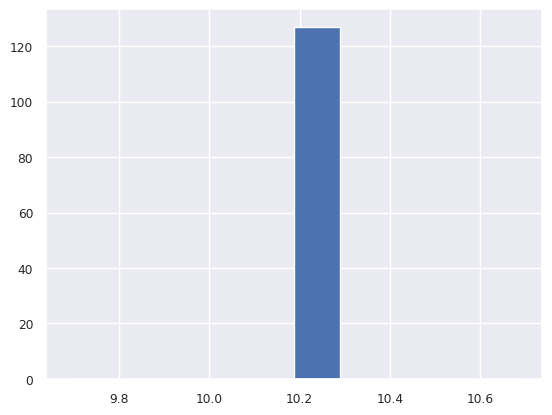

In [185]:
plt.hist(y_pred)